![](https://datasciencechalktalk.files.wordpress.com/2019/09/cattura.jpg?w=1266)

# Exploratory Data Analysis involves two fundamental steps:
- Data Analysis (Data Pre processing, Cleaning and Manipulation).
- Data Visualisation (Visualise relationships in data using different types of plots).

## Knowledge Discovery in Database (KDD) Process
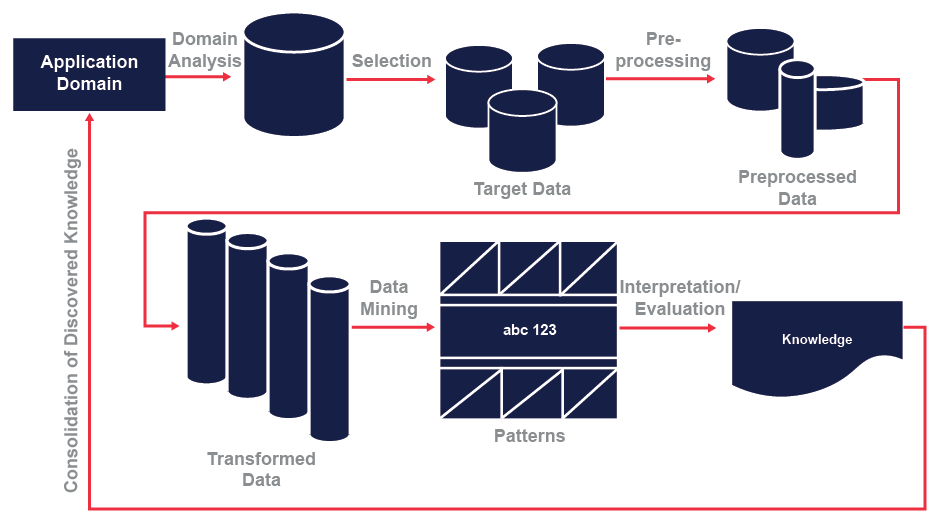

EDA movies data set

link: https://www.kaggle.com/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

In [ ]:
import pandas as pd
import numpy as np
#import file dữ liệu
movies = pd.read_csv('imdb_top_1000.csv')

# DATA PRE-PROCESSING

In [ ]:
#copy new dataframe
#check null value và variable
print(movies.info(),'\n')
movies_process = movies.copy()

In [ ]:
#xử lý null value
values = {'Certificate':'Unrated','Meta_score':0,'Gross':'0'}
movies_process.fillna(value=values,inplace=True)

## Knowledge Discovery in Database (KDD) Process
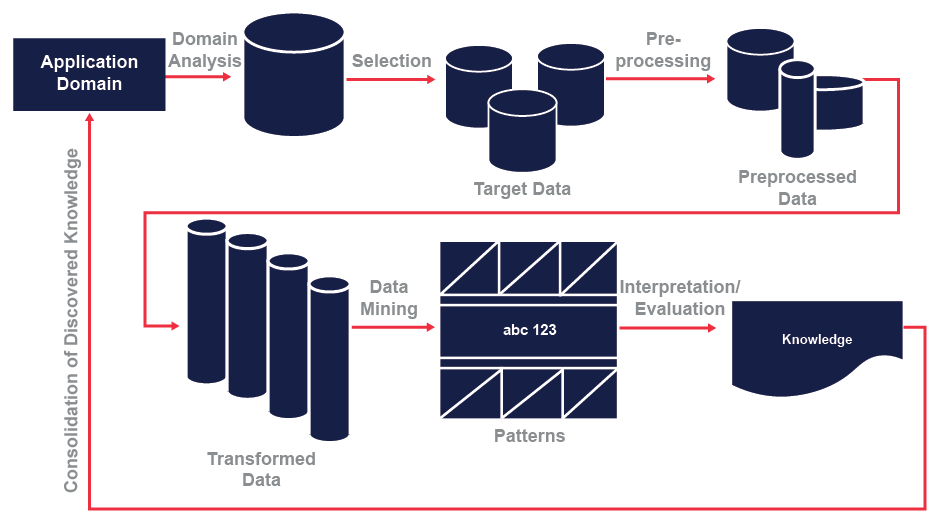

In [ ]:
print(movies_process['Runtime'][:10])
#xóa chữ min và convert thành dạng số cho trường Runtime
movies_process['Runtime']=movies_process['Runtime'].str.replace('min','')
movies_process['Runtime']=movies_process['Runtime'].astype(str).astype(int)
print(movies_process['Runtime'][:10])

In [ ]:
print(movies_process['Released_Year'].drop_duplicates())
#loại bỏ dòng có giá trị năm sai (PG) và convert từ string thành số
movies_process = movies_process[movies_process['Released_Year']!='PG']
movies_process['Released_Year'] = movies_process['Released_Year'].astype(str).astype(int)
print(movies_process['Released_Year'].drop_duplicates())

In [ ]:
print(movies_process['Gross'][:5])
#convert trường Gross từ string thành số 
movies_process['Gross']=movies_process['Gross'].str.replace(',','')
movies_process['Gross']=movies_process['Gross'].astype(str).astype(int)
print(movies_process['Gross'][:5])

In [ ]:
#tạo một trường dữ liệu mới dựa trên trường Released_Year
conditions = [movies_process['Released_Year'] < 2000, movies_process['Released_Year'] >= 2000]
values = ['Century20','Century21'] 
movies_process['Century'] = np.select(conditions, values)
print(movies_process[['Century','Released_Year']].drop_duplicates())

In [ ]:
#tạo trường Gerne123 dựa trên trường Gerne
movies_process['Genre']=movies_process['Genre'].str.replace(' ','')
movies_process['Genre1']=movies_process['Genre'].str.split(',').str[0]
movies_process['Genre2']=movies_process['Genre'].str.split(',').str[1]
movies_process['Genre3']=movies_process['Genre'].str.split(',').str[2]

print(movies_process[['Genre','Genre1','Genre2','Genre3']].drop_duplicates())

# VISUALIZATION AND MANIPULATE DATA

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib notebook

BOXPLOT VA HISTOGRAM

In [ ]:
print(movies_process['Runtime'].max())

In [ ]:
sns.displot(movies_process['Runtime'],bins=321)
plt.show()

In [ ]:
#boxplot
sns.boxplot(x=movies_process['Runtime'],showmeans=True)
plt.show()

In [ ]:
#multiple boxplot
sns.boxplot(x=movies_process['Runtime'],y=movies_process['Century'],showmeans=True)
plt.show()

In [ ]:
sns.boxplot(x=movies_process['Runtime'],y=movies_process['Genre1'])
#plt.xticks(rotation=45)
plt.show()

In [ ]:
#create data for barchart
df_barchart=movies_process.groupby('Genre1')['Genre1'].count() #tạo 1 series đếm số lượng movies
df_barchart.rename('Number of movies',inplace=True) #đặt tên cho trường dữ liệu
df_barchart =pd.DataFrame(df_barchart) #convert series thành dataframe
df_barchart.reset_index(inplace=True) #chuyển index Genre thành 1 trường dữ liệu

df_barchart.head()

In [ ]:
#barchart
sns.barplot(data=df_barchart,x='Genre1',y='Number of movies')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#multiple barchar
#create data for barchart. count number movies by Genre1 và Century
df_barchart=movies_process.groupby(['Genre1','Century'])['Genre1'].count()
df_barchart.rename('Number of movies',inplace=True)
df_barchart =pd.DataFrame(df_barchart)
df_barchart.reset_index(inplace=True)

sns.barplot(x='Genre1',y='Number of movies', hue="Century", data=df_barchart)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#stacked barchart
#create data for stacked barchart
df_barchart_stack=pd.pivot_table(df_barchart,values='Number of movies', index='Genre1',
                    columns='Century')
df_barchart_stack.reset_index(inplace=True)
df_barchart_stack.fillna(0,inplace=True)
print(df_barchart.head())
print(df_barchart_stack.head())

In [ ]:
#stacked barchart
df_barchart_stack.plot(x='Genre1',kind='bar',stacked=True)
plt.ylabel('Number of movies')
plt.show()

In [ ]:
#proportion between Century20 và 21 by Genre1
df_barchart_stack.set_index('Genre1',inplace=True)
df_barchart_stack = df_barchart_stack.apply(lambda x: x*100/sum(x),axis=1) #axis=1 tính theo dòng
df_barchart_stack.reset_index(inplace=True)
print(df_barchart_stack.head())

df_barchart_stack.plot(x='Genre1',kind='bar',stacked=True) #color=['orange','blue']
plt.ylabel('proportion of movies number')
plt.legend(bbox_to_anchor = (1, 0.5))
plt.show()

In [ ]:
#create data for linechart:
df_linechart=movies_process.groupby('Released_Year')['IMDB_Rating'].mean()# tính điểm IMDB trung bình theo năm 
df_linechart.rename('AVG_IMDB_Rating',inplace=True) #thay đổi tên trường
df_linechart =pd.DataFrame(df_linechart) #convert thành dataframe
df_linechart.reset_index(inplace=True) #chuyển trường năm đang là index thành 1 trường dữ liệu

#plotting by seaborn
sns.lineplot(data=df_linechart, x="Released_Year", y="AVG_IMDB_Rating")
plt.show()

In [ ]:
#tạo dataframe cho pie chart
#tạo trường phân loại for_adult và all_age dựa trên trường Certificate
all_age = ['U','G']
for_adult = ['A','U/A','UA','A','GP','PG','PG-13','R','TV-14','TV-MA','TV-PG']
certified = all_age+for_adult

conditions = [movies_process['Certificate'].isin(all_age), movies_process['Certificate'].isin(for_adult),
              ~movies_process['Certificate'].isin(certified)] #isin(list)
values = ['all_age','for_adult','non-certify'] 

movies_process['certify'] = np.select(conditions, values)

movies_process[['Certificate','certify']].drop_duplicates().sort_values(by='certify')

In [ ]:
#tạo data cho pie chart
df_piechart=pd.pivot_table(movies_process,values='Gross', index='certify',
                    columns='Century', aggfunc=np.sum) #np.count_nonzero, index là dòng, 
df_piechart.reset_index(inplace=True)
df_piechart.head()

In [ ]:
#pie chart
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('The propotion of gross by century',fontsize=15)

ax1.pie(df_piechart['Century20'], labels=df_piechart['certify'], autopct='%1.1f%%')#laels: trường dữ liệu phân loại
ax1.set_title('Century20')

ax2.pie(df_piechart['Century21'], labels=df_piechart['certify'], autopct='%1.1f%%')
ax2.set_title('Century21')

plt.show()

In [ ]:
movies_process.columns

In [ ]:
#scatter plot
#fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(13,5))
sns.scatterplot(x=movies_process['No_of_Votes'], y=movies_process['IMDB_Rating'],data=movies_process)
plt.show()
correlation = movies_process['IMDB_Rating'].corr(movies_process['No_of_Votes'])
print(correlation)

In [ ]:
from wordcloud import WordCloud
#word cloud for director name
#set data for word cloud
movies_process['Director_string'] = movies_process['Director'].str.replace(' ','_') #gộp first và last name
director = movies_process['Director_string'].tolist() #convert series to list
director_string = " ".join(director) #convert to string

#plotting
plt.figure(figsize = (10,5))
plt.imshow(WordCloud(background_color='white').generate(director_string))
plt.show()